# Curso de Machine Learning Aplicado con Python

![Machine-Learning](assets/Machine-Learning.jpg)

## Implementar un modelo de regresión (Lasso)

In [1]:
# importamos las librerias
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
print("""
Version Numpy:     \t{} 
Version Pandas:    \t{} 
Version Matplotlib:\t{}
Version seaborn:   \t{}""".format(np.__version__,pd.__version__,matplotlib.__version__,sb.__version__))



Version Numpy:     	1.13.1 
Version Pandas:    	0.20.3 
Version Matplotlib:	2.0.2
Version seaborn:   	0.8.0


### Implementemos un modelo simple de regresión primero

In [2]:
#Exportamos el dataset ya limpio
X = pd.read_csv('X.csv')

In [3]:
X.head()

,Production Budget,Worldwide Gross,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio
0,425000000.0,2.783919e+09,7.230000e+02,1.780000e+02,0.000000e+00,8.550000e+02,1.000000e+03,7.605058e+08,0.000000e+00,3.054000e+03,2.370000e+08,2.009000e+03,9.360000e+02,1.780000e+02
1,410600000.0,1.045664e+09,4.480000e+02,1.360000e+02,2.520000e+02,1.000000e+03,4.000000e+04,2.410639e+08,4.000000e+00,4.840000e+02,2.500000e+08,2.011000e+03,1.100000e+04,2.350000e+02
2,330600000.0,1.408219e+09,6.350000e+02,1.410000e+02,0.000000e+00,1.900000e+04,2.600000e+04,4.589916e+08,4.000000e+00,1.117000e+03,2.500000e+08,2.015000e+03,2.100000e+04,2.350000e+02
3,306000000.0,2.058662e+09,1.182331e+09,1.182331e+09,1.182331e+09,1.182331e+09,1.182331e+09,1.182331e+09,1.182331e+09,1.182331e+09,1.182331e+09,1.182331e+09,1.182331e+09,1.182331e+09
4,300000000.0,9.634204e+08,6.317102e+08,6.317102e+08,6.317102e+08,6.317102e+08,6.317102e+08,6.317102e+08,6.317102e+08,6.317102e+08,6.317102e+08,6.317102e+08,6.317102e+08,6.317102e+08


In [4]:
# separamos la columna de Worldwide Gross ya que es nuestra variable objetivo, la sacamos del data  de X y la pasare al vector Y
y = X['Worldwide Gross']

In [5]:
#Eliminamos la columna del set de X
X = X.drop('Worldwide Gross', axis=1)

In [6]:
#Ahora lo que hacemos es separar los datos
from sklearn.model_selection import train_test_split
#lo que haremos es que asignaremos un 40% para datos de test y el resto para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [7]:
# Comprobamos
print("""
# de datos por col en X:       \t {}\t100%
# de datos por col en X_train: \t {}\t{}%
# de datos por col en X_test:  \t {}\t{}%""".format(len(X), len(X_train), (len(X_train)/len(X))*100, len(X_test), (len(X_test)/len(X))*100))


# de datos por col en X:       	 5011	100%
# de datos por col en X_train: 	 3006	59.9880263420475%
# de datos por col en X_test:  	 2005	40.0119736579525%


**Entramos en materia de ML** *Ocuparemos una regresion `Lasso` que se encuentra en un modulo que se llama `linear_model`, en donde linear model es todo una familia de modelos de ML que incluye la regresión, la regresion logistica entre otros que son denominados modelos lineales*

In [8]:
from sklearn.linear_model import Lasso
#Utilizaremos lasso de una manera sencilla, lo primero que hacemos es instanciarlo
model = Lasso()

In [9]:
#Lo entrenamos
model.fit(X_train,y_train)
#Con esto basta para entrenar el modelo ._.
# no preocuparse por la alerta que sale

C:\Users\willa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
# y ahora haremos las predicciones con el dataset de test
predicted = model.predict(X_test)

In [11]:
#Que tal se ven nuestras predicciones 
print("Este vector cuenta con", predicted.shape[0], "datos")
predicted

Este vector cuenta con 2005 datos


array([  7.05316000e+06,   2.15819113e+08,  -1.44718022e+07, ...,
        -1.57806509e+07,   5.30371107e+07,  -1.12833266e+07])

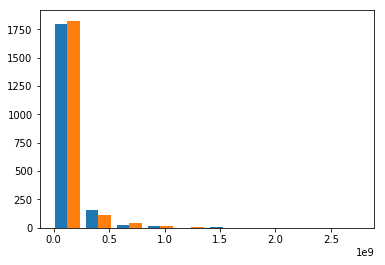

In [12]:
#veremos graficamente la comparacion de los resultados de predicted contra y_test
%matplotlib inline

plt.hist([predicted,y_test]);
# en cuentas generales esta mas o menos bien por que son similares pero podemos hacer algo mejor
# Que nos dice este histogram:
# Que las peliculas con presupuesto con cifras menores a billon de dolares(exactamente entre 0.0 y el 0.25) 
# son 1750 peliculas aproximademente, y esto concuerda con nuestra prediccion

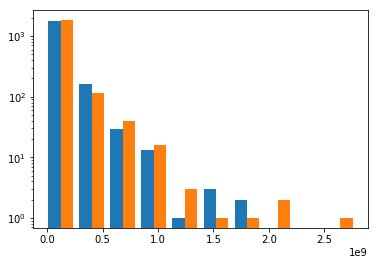

In [13]:
#Otra forma de ver el histogram
plt.hist([predicted,y_test],log=True);

# 19 - Evaluando el modelo

Para evaluar la perfomance del modelo scikit-learn nos ofrece todo uan serie de herramientas:
* Por un lado diferentes *metricas* que vienen en el modulo `sklearn.metrics`
* Y por otro lado tambien en `sklearn.model_selection` nos ofrece funciones entre ellas para sacar *score* este modulo ocupa internamente el modulo de *mterics*

## Evaluemos de forma más fina el comportamiento de nuestro modelo

<div style="background-color:#C5E0DC">
Los estimadores y las funciones de sklearn vienen cone el máximo de argumentos con valores por defecto que suelen ser las mejores opciones si no tenemos algun conocimiento particular de el problema. En este caso particular la funcion `estimator.score` ya viene con una de las métricas de `sklearn.metrics` que es la metrica `sklearn.metric.r2_score`
</div>

<div style="background-color:#77ee77">
El **score R2** de una regresión es una de las formas mas comunes de entender su poder predictivo.
Este **mientras más cerca de 1 este, mejor es**

</div>

<div style="background-color:#77ee77">
Los valores que pueden tomar son de -infinito hasta 1. Un score negativo es malo, ya que 
esto indica que la regresión es peor que si simplemente eligieramos un valor fijo como prediccion para todos los puntos, la media.
</div>

In [17]:
# Veremos el score que genera nuestro modelo
model.score(X_test,y_test)
# entre mas se acerque a un mejor es, asi que tenemos un excelente score, 
# pero aun podemos mejorarlo asi sea un poco

0.90736897385448578

Un buen score R2 es importante para una regresión. Pero no lo es todo. De forma general los scores hay que complementarlos con visualizaciones de los datos ya que una métrica no logra siempre encodear todas las caracteristicas de una distribucion de probabilidades. Un ejemplo es el siguiente:

![datasaurus](assets/datasaurus.png)

Lo sorprendete es qeu todas las graficas tienen los mismos datos estadisticos que se muestran arriba siendo que su forma es muy diferente, todos tienen la misma media, la misma desviacion estandar, la misma correlación.

**Asi que nos podemos fiar de solo un score**


**Por lo que siempre hay que vizualizar tus resultados,** aunque se tenga un buen score de perfomance

In [18]:
# graficaremos con matplotlib con 
# residuales(todas las diferencia que hay entre las predicciones y los valores reales)
residuals = y_test - predicted

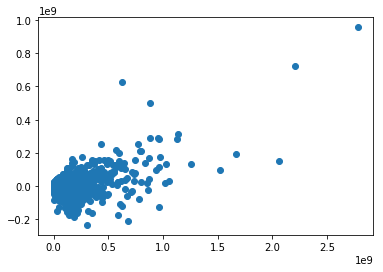

In [19]:
# En matplotlib haremos un scatter plot
# en funcion del ingreso(y_test) vamos a ver que tanto error hay
plt.scatter(y_test, residuals)

Por lo que se ve es bastante bien, se ve centradoe en cero, lo que buscamos graficando estos residuales es que no se vean patrones aparentes, ya que esto significara un mal modelo, por ejemplo si hubiesen un grupo de errores  que esten todos juntos en otro lado al que ya vimos seria malo

**Lo que queremos despues es mejorar todos los puntos que se encuentran alejados, que si bien no forman un patron, igual estan bastante lejos de la predicción**

Veremos estos mismos errores que son **absolutos(dolares)** ahora en **porcentajes**

In [21]:
#Por lo que creamos otra variable
# Le llamo ap_residuals por que solo voy a tomar valores absolutos, ninguno negativo
# Tambien lo voy a normalizar para tener el porcentaje de error mas que el valor absoluto
ap_residuals = np.abs(residuals)/y_test

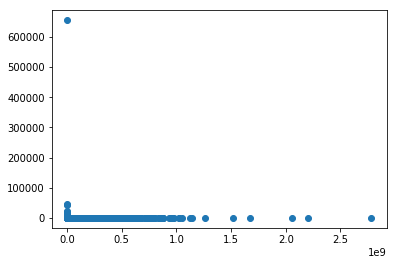

In [22]:
plt.scatter(y_test,ap_residuals)

Si la mayoria esta en cero es muy bueno, pero algunas, muy pocas peliculas estan alejadas con unos errores en porcentaje bastante altos, exactamente esa que sobrepasa los 600000

Aplicaremos otra tecnica, que es utilizar una escala logaritmica

In [23]:
# Defino mi variable para logaritmos, loq ue nos permitira ver los dato en orden de magnitud
lap_residuals = np.log(ap_residuals)

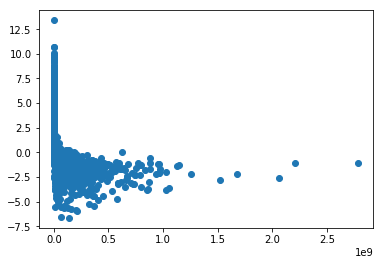

In [24]:
plt.scatter(y_test,lap_residuals)

Vemos que todos nuestros puntos estan muy concentrados cerca del 0%, las peliculas de bajo presupuesto se escapan mas(la linea vertical que se forma)
que son aquellas que lograron generar mas presupuesto que el esperado, no podemos imaginar los hits de peliculas independientes que no tenia un presupuesto muy alto

**De forma general ya podemos concluir que tenemos una buena aproximacion**


Para cerrar podemos hacer una evaluacion numerica de nuestros errores, un diagrama que se suele llamar
**la funcion cumulativa** de la distribucion de los errores

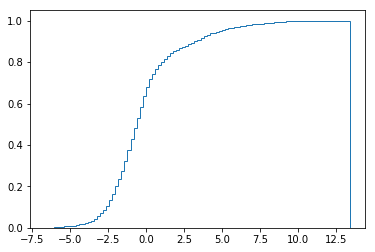

In [27]:
#Este histograma tendra 100 distintos valores, 
#normalizamos todo y lo llevamos a la norma 1
#qureremos que el histogram se haga paso por paso, 
# y que se acumule
plt.hist(lap_residuals, bins=100,normed=1, histtype='step', cumulative=True);

Lo que se obtiene es la evolucion de cual es el error de nuestras medidas

Lo que se podria entender como que:
* Si me paro sobre el eje x en -1 me doy cuenta que tengo un error del 10% para el .4(40%) de los datos
* Si me paro sobre el 0 significa que tengo errores inferiores al 100% tengo en el 0.8(80%) de los datos


array([ 0.13533528,  0.22313016,  0.36787944,  0.60653066,  1.        ])

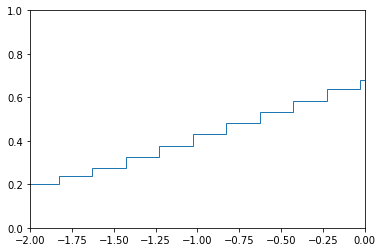

In [28]:
#Apliquemos un zoom para ver mejor
plt.hist(lap_residuals, bins=100,normed=1, histtype='step', cumulative=True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))

Lo que nos dice esto es que:
* parandome sobre -2.00 = Errores menores al 1% tengo el 0.2(20%) de los datos
* parandome sobre -1.00 = Errores menores al 10% tengo el 0,4(40%) de los datos
* parandome sobre el 0 = Errores menores al 100% tengo el 0.7(70%) de los datos